# Types of visualization - presenting global patterns and summary statistics

## Learning outcomes

By the end of the lesson, you will be able to:
- <b>Create plots that present global patterns in data</b>: scatter plots; hexbin plots; contour plots; line plots; heatmaps.
- <b>Create plots that present summary statistics of your data</b> histograms revisited; box plots and violin plots.

## Introduction

Data visualization is as much about the art of reaching the content consumers, as about the science of deriving statistical insights from data. The intent of this lesson is to acquire the practical knowledge of the strengths and limitations of various visualization techniques, such that you can easily balance this science and art. 

In the previous lesson, we learnt how to handle pandas dataframes as inputs for data visualization, how to plot with pandas and seaborn, and how to refine plots to increase their aesthetic appeal. The next step is to practice creating plots for a variety of different contexts. However, you will notice that the variety in existing plot types and visualization techniques is huge, and the choice of appropriate visualization is often confusing. There are times when a plot shows too much information for the reader to grasp, or too little for the reader to get the necessary intuition regarding the data. There are times when the visualization is too esoteric for the reader to appreciate properly, and other times when an over-simplistic visualization just doesn't make the right impact. All these scenarios can be avoided by being armed with the practical knowledge of the interpretation of different kinds of visualization techniques and their strengths and limitations.

This lesson is a primer on the different types of visualization and the contexts in which they are most effective. Using seaborn, you will learn to create a variety of plots and become proficient in selecting the right kind of visualization for the most suitable representation of your data. Combining these skills with the techniques learnt in the first lesson of this courseware will help you make stellar plots that are both meaningful and attractive.

## Creating plots that present global patterns in data

In this section, we will study the plots that present the global patterns in data -- i.e. plots which show the variance in individual features in the data (e.g. histograms), as well as how different features present in data vary with respect to each other (e.g. scatter plots, line plots, heatmaps). 

In the next few sections, we will work with a dataset called 'mpg'. It was published by the StatLib library maintained at Carnegie Mellon University, and is available in the seaborn library. It was originally used to study the relationship of mileage -- Miles Per Gallon (MPG) -- with other features in the dataset. Hence the name, mpg. Since the dataset contains 3 discrete and 5 continuous features, it is a good fit for illustrating multiple concepts in this chapter.

Here's what the dataset looks like:

In [1]:
import seaborn as sns

# load a seaborn dataset
mpg_df = sns.load_dataset("mpg")
print(mpg_df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


### Scatter plots

The first type of plot we will generate is called a scatter plot.

A scatter plot is a simple plot presenting the values of two features in a dataset. Each datapoint is represented by a point with x-coordinate as the value of the first feature, and y-coordinate as the value of the second feature. 

A scatter plot is a great tool to learn more about two such numerical attributes. We will learn more about this plot with the help of an exercise.

#### Exercise: Creating a scatter plot

In this exercise, we will generate a scatter plot to examine the relationship between weight and mileage (mpg) of the vehicles.
1. Import the necessary python modules.

In [2]:
import seaborn as sns

2. Import the dataset from seaborn.

In [3]:
mpg_df = sns.load_dataset("mpg")

 3. Generate a scatter plot using the seaborn function scatterplot().

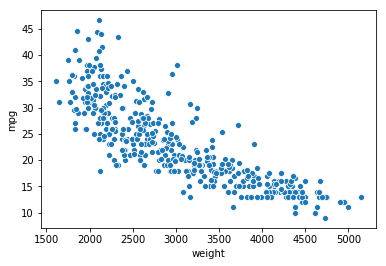

In [4]:
# seaborn (‘version 0.9.0 is required’)
ax = sns.scatterplot(x="weight", y="mpg", data=mpg_df)

Notice that the scatter plot shows a decline in mileage (mpg) with an increase in weight. That's a useful insight into the relationships between different features in the dataset. Scatter plots can help excavate relationships in different features in data such as weather and sales, nutrition intake and health statistics etc - you get the idea, this is applicable in several contexts. 

### Hexagonal binning plots

There’s also a fancier version of scatter plots, called hexbin plot -- this can be used when both rows and columns correspond to numerical attributes. Where there are lots of data points, the plotted points on a scatter plot can end up overlapping resulting in a messy graph. It can be hard to infer trends in such cases. With a hexbin plot, a lot of data points in the same area can be shown using a darker shade. This way, we end up with a cleaner graph that’s clearer to read.

#### Exercise: Creating a hexagonal binning plot

In this exercise, we will generate a hexagonal binning plot (also called hexbin plot) so as to get a better understanding of the relationship between weight and mileage (mpg) of the vehicles.
1. Import the necessary python modules.

In [5]:
import seaborn as sns

2. Import the dataset from seaborn.

In [6]:
mpg_df = sns.load_dataset("mpg")

3. Plot a hexbin plot using the seaborn function jointplot.

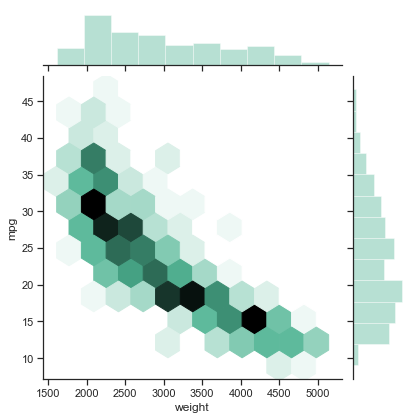

In [7]:
## set the plot style to include ticks on the axes.  
sns.set(style="ticks")

## hexbin plot
sns.jointplot(mpg_df.weight, mpg_df.mpg, kind="hex", color="#4CB391")

Interpretation of hexbin plots: Hexbin plots use hexagons to represent clusters of data points. The darker bins indicate that there are a larger number of points in the corresponding ranges of features on the x- and y-axis. The lighter bins indicate less points. The white space corresponds to no points. The histogram on the top and right axes depict the variance in the features represented by X and Y axes respectively (mpg and weight in this example).


As you can notice in the previous scatter plot, data points overlapped heavily in certain areas obscuring the actual distribution of the features. Hexbin plots are quite a nice data visualization tool when the data points are very dense. 

### Contour plots

Another alternative to scatter plots when the datapoints are densely populated in specific region(s), is a contour plot. The advantage in using countour plots is the same as hexbin plots - accurately depicting distribution of features in the visualisation in cases where data points are likely to be overlapping heavily. An example is given below:

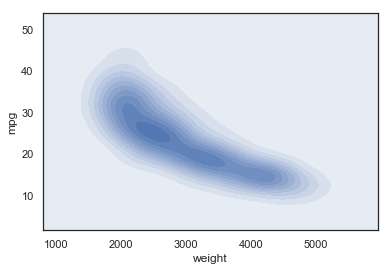

In [8]:
# contour plot
sns.set_style("white")

# generate KDE plot: first two parameters are arrays of X and Y coordinates of data points
# parameter shade is set to True so that the contours are filled with a color gradient based on number of data points
sns.kdeplot(mpg_df.weight, mpg_df.mpg, shade=True)



Interpretation of contour plots: The interpretation of contour plots is similar to hexbin plots -- darker regions indicate more datapoints, and lighter regions indicate less datapoints. 

In our example of weight vs mileage (mpg), the hexbin plot and the contour plot indicate that there is a certain curve along which the negative relationship between weight and mileage is the strongest as evident by the larger number of data points. The negative relationship becomes relatively weaker as we move away from the curve (less data points).

Contour plots are popularly used to show distribution of weather indicators such as temperature, rainfall etc on maps of geographical regions. 

### Line plots

Before we introduce line plots, let's look at another scatter plot for a different pair of features -- model_year and mpg.

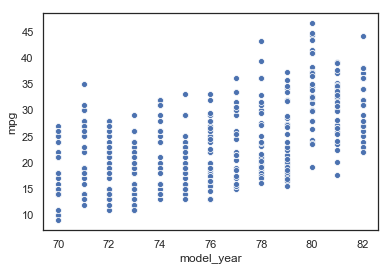

In [9]:
# seaborn 2-D scatter plot 
ax1 = sns.scatterplot(x="model_year", y="mpg", data=mpg_df)

In the above example, we see that the `model_year` feature only takes discrete values between 70 and 82. Now, when we have a discrete numerical feature like this (`model_year`), drawing a line plot is a good idea. We can draw a simple line plot showing the relationship between model_year and mileage (mpg) with the following code:

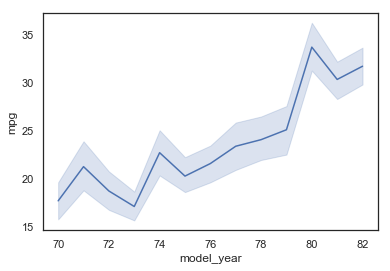

In [10]:
# seaborn (‘version 0.9.0 is required’) line plot code
ax = sns.lineplot(x="model_year", y="mpg", data=mpg_df)

Interpretation of line plot: The points connected by the solid line represent the mean of the y-axis feature at the corresponding x-coordinate. The shaded area around the line plot shows the confidence interval for the y-axis feature (by default, seaborn sets this to 95% confidence interval). The parameter 'ci' can be used to change to a different confidence interval. The phrase `x%` confidence interval translates to a range of feature values where x% of the datapoints are present. An example to change to a confidence interval of 68% is shown in the code below:

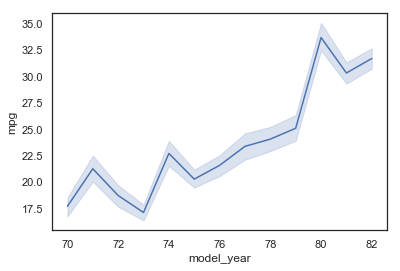

In [11]:
sns.lineplot(x="model_year", y="mpg", data=mpg_df, ci=68)

Line plots are great for scenarios where we have data that changes over time – the x-axis could represent date or time, and the plot would help to visualize how a value varies over that period.

Speaking of presenting data across time using line plots, let us consider the example of the flights dataset from seaborn.

In [12]:
flights_df = sns.load_dataset("flights")
print(flights_df.head())

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121


Suppose you want to look at how the number of passengers is varying across years in each month. How would you display this information?

One option is to draw multiple line plots in a single figure. For example, let's look at the line plots for the months of December and January across different years. We can do this with the code below.

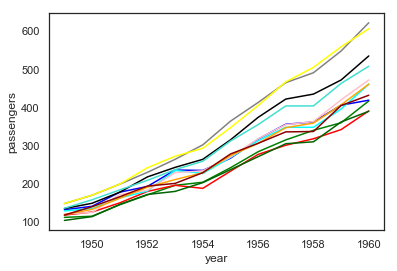

In [13]:
#flights_df = flights_df.pivot("month", "year", "passengers")
#ax = sns.heatmap(flights_df)

# line plots for the planets dataset
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='January'], color='green')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='February'], color='red')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='March'], color='blue')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='April'], color='cyan')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='May'], color='pink')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='June'], color='black')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='July'], color='grey')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='August'], color='yellow')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='September'], color='turquoise')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='October'], color='orange')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='November'], color='darkgreen')
ax = sns.lineplot(x="year", y="passengers", data=flights_df[flights_df['month']=='December'], color='darkred')

With this example of 12 line plots, we can see how a figure with too many line plots quickly begins to get crowded and confusing. Thus, for certain scenarios, line plots are neither appealing nor useful. 

So, what is the alternative for our use case? 

### Heatmaps

Enter heatmaps.

What is a heatmap?: A heatmap is a visual representation of a specific continuous numerical feature as a function of two other discrete features (either categorical or discrete numerical) in the dataset. The information is presented in a grid form -- each cell in the grid corresponds to a specific pair of values taken by the two discrete features, and is colored based on the value of the third numerical feature.

Let us go through a concrete example. we will use the seaborn `flights` dataset to generate a heatmap depicting the number of passengers per month across the years 1949-1960.

Let's start with importing the seaborn module and loading the `flights` dataset.

In [14]:
import seaborn as sns
flights_df = sns.load_dataset('flights')

Now we need to `pivot` the dataset on the required variables using pivot() function before generating the heatmap. The pivot function first takes the feature that will be displayed in rows, then the one displayed in columns, and finally the feature whose variation we are interested in observing.

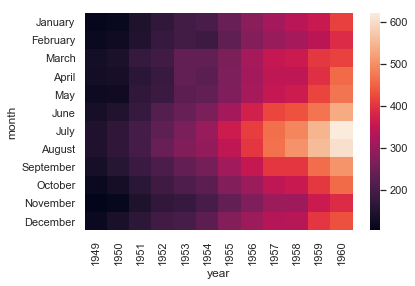

In [15]:
df_pivoted = flights_df.pivot("month", "year", "passengers")
ax = sns.heatmap(df_pivoted)

A heatmap is a great tool to visualize high-dimensional data and even tease out features that are particularly variable across different class. In our example, we can note that the total number of yearly flights has increased steadily since 1949. Moreover, the months July and August seem to have the largest number of flights (as compared to other months) across the years in observation. Now, that's an interesting trend to find from a simple visualization!

Plotting heatmaps is a very fun thing to explore, and there are lots of options available to tweak with the parameters. You can learn more about them [here](https://seaborn.pydata.org/generated/seaborn.clustermap.html) and [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html). However, we will only mention a few important aspects here -- the clustering option and the distance metric.

#### Clustering in heatmaps

Rows or columns in a heatmap can also be clustered based on the extent of their similarity. To do this in seaborn, use the clustermap option like so:

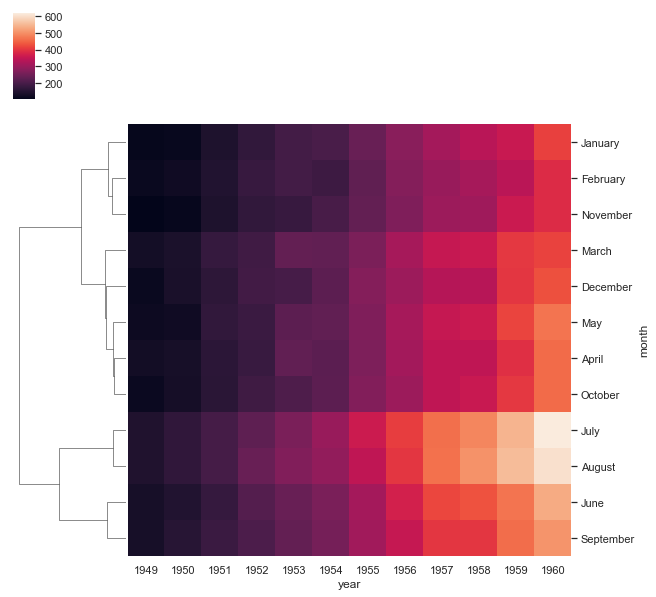

In [16]:
ax = sns.clustermap(df_pivoted, col_cluster=False, row_cluster=True)

Did you notice how the order of months got rearranged in the plots but some months (e.g. July and August) stuck together because of their similar trends? In both July and August, the number of flights has increased relatively more drastically in the last few years uptil 1960. 

In the above example, we clustered the flight data by month, but we could, of course, cluster the data by year by switching the parameter values (`row_cluster=False, col_cluster=True`) or cluster both by row and column (`row_cluster=True, col_cluster=True`).  

#### Distance metric in heatmaps

At this point, one may wonder, but wait, how is the similarity between computed? The answer is that it depends on the distance metric -- i.e. how the distance between two rows or two columns is computed. The rows/columns with the least distance are clustered closer together than the ones with larger distance. The user can set the distance metric to one of the many available options ('manhattan', 'euclidean', 'correlation', etc) simply using the `metric` option as below. You can read more about the distance metric options [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html). Note that seaborn sets the metric to 'euclidean' by default.

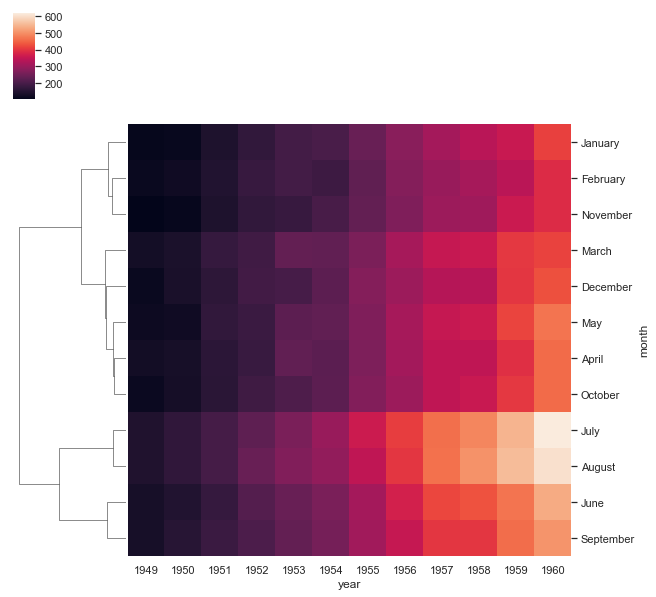

In [17]:
# equivalent to ax = sns.clustermap(df_pivoted, row_cluster=False, metric='euclidean')
ax = sns.clustermap(df_pivoted, col_cluster=False) 

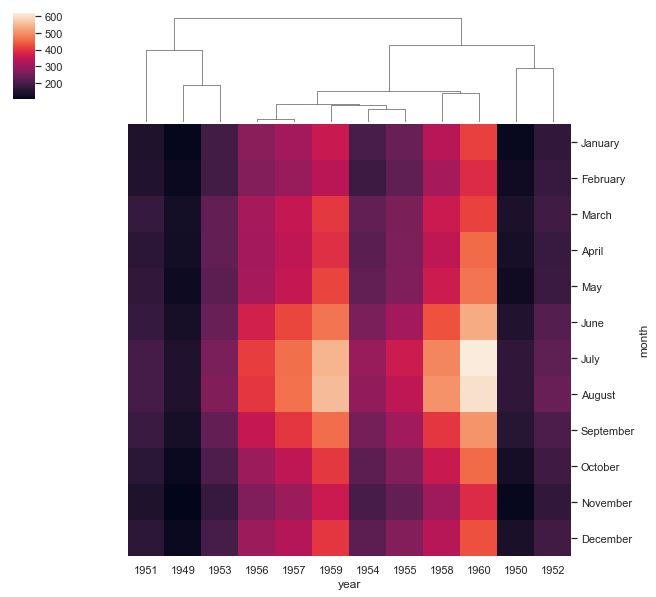

In [18]:
# change distance metric to correlation
ax = sns.clustermap(df_pivoted, row_cluster=False, metric='correlation')

On reading about the distance metric, we learn that it defines the distance between two rows/columns. However, if we look carefully, we see that the heatmap also clusters, not just individual rows or columns, but also groups of rows and columns. This is where linkage comes into picture. But hold your breath for a moment before we come to that!

#### The concept of linkage

The clustering seen in heatmaps is called agglomerative hierarchical clustering because it involves sequential grouping of rows/columns until all of them belong to a single cluster, resulting in a hierarchy. Without loss of generality, let's assume we are clustering rows. The first step in hierarchical clustering is to compute the distance between all possible pairs of rows, and select two rows, say A and B, with the least distance. Once these rows are grouped, they are said to be 'merged' into a single cluster. Once this happens, we need a rule that not only determines distance between two rows, but also distance between any two clusters (even if the cluster contains a single point). 
- If we define the distance between two clusters as the distance between the two points across the clusters closest to each other, the rule is called _single linkage_. 
- If the rule is to define distance between two clusters as the distance between the points farthest to each other, it is called _complete linkage_. 
- If the rule is to define distance as the average of all possible pairs of rows in the two clusters, it is called _average linkage_. 

The same holds for clustering columns too. Going back to the code, we can incorporate linkage into the clustermap method by using the parameter `method` as below.

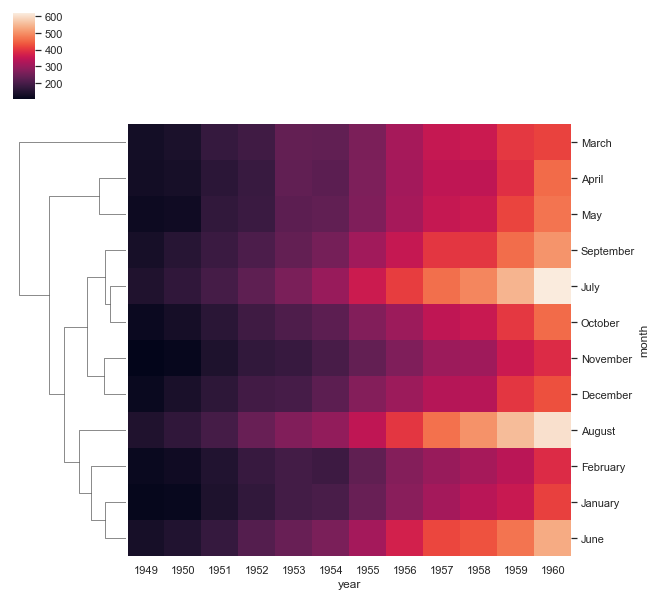

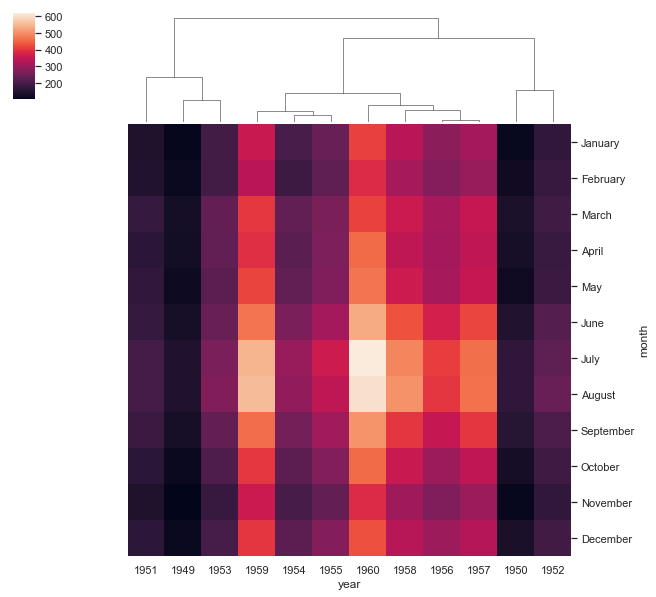

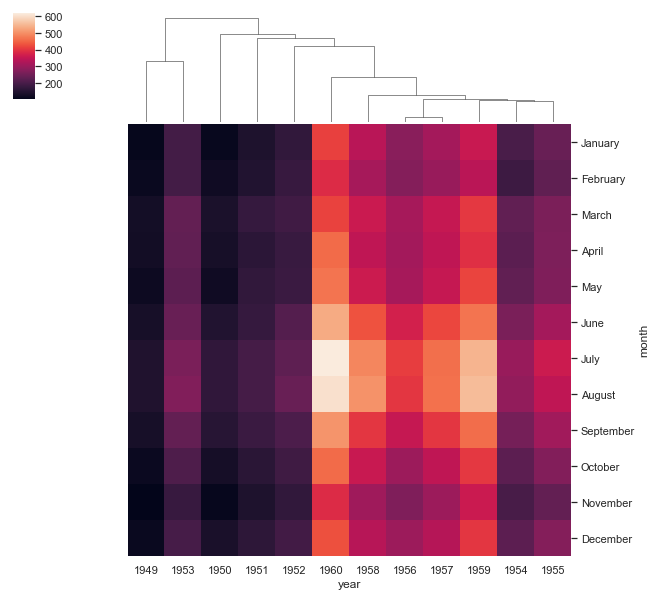

In [19]:
ax = sns.clustermap(df_pivoted, col_cluster=False, metric='correlation', method='average')
ax = sns.clustermap(df_pivoted, row_cluster=False, metric='correlation', method='complete')
ax = sns.clustermap(df_pivoted, row_cluster=False, metric='correlation', method='single')

Heatmaps are also a good way to visualise what happens in a 2D space. For example, they can be used to show where the most action is on the pitch in a soccer game. Similarly for a website, heatmaps can be used to show the areas that are most frequently moused over by users.


### Topic summary
In this section, we studied plots that present the global patterns of one or more features in a dataset. Most data scientists prefer to see such plots because they give an idea of the entire spectrum of values taken by the features of interest. Plots depicting global patterns are also useful because they make it easier to spot anomalies in the data. The following plots were specifically highlighted in the section:
- scatter plots: useful to observe the relationship between two potentially related features in the dataset
- hexbin plots and contour plots: a good alternative for scatter plots when data is too dense in some parts of feature space
- line plots: useful to indicate the relationship between a discrete numerical feature (on the x-axis) and continuous numerical feature (on the y-axis)
- heatmaps: useful to examine the relationship between a continuous numerical feature of interest with two other features that are either categorical or discrete numerical.

### Assessment Questions 

Each point in a scatter plot represents: </br>
a) a feature </br>
b) a datapoint </br>
c) both of the above </br>
d) neither of the above </br>

answer: b

Heatmaps help to represent the relationship of a continuous numerical feature with: </br>
a) two features that are either categorical or discrete numerical </br>
b) two features that are necessarily categorical </br>
c) two features that are necessarily discrete numerical </br>
d) two features that are necessarily continuous numerical </br>

answer: a

A line plot is useful to study the relationship between: </br>
a) a continuous numerical feature and a discrete numerical feature </br>
b) a continuous numerical feature and a categorical feature </br>
c) two continuous numerical features </br>
d) two discrete numerical features </br>

answer: a

## Creating plots that present summary statistics of your data

It's now time for a switch to our next section. When the datasets are huge, it is sometimes useful to look at the summary statistics of a range of different features and get a preliminary idea of the dataset. For example, summary statistics for any numerical feature include measures of central tendency such as mean, measures of dispersion such as standard deviation. 

When a dataset is too small, plots presenting summary statistics may actually be misleading because summary statistics are meaningful only when the dataset is big enough to draw statistical conclusions. For example, if somebody reports variance of a feature using 5 data points, we cannot make any concrete conclusions regarding the `dispersion` of the feature. 

### Histograms revisited

Let’s revisit histograms from chapter 1. Although histograms show the distribution of a given feature in the data, we can make the plot a little more informative by showing some summary statistics in the same plot. Let’s go back to our mpg dataset and draw such a histogram to analyse the spread of vehicle weights in the data set.

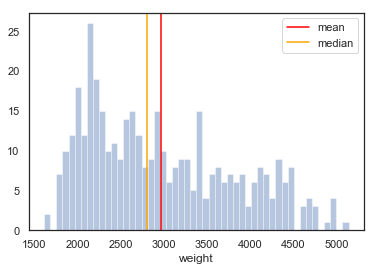

In [20]:
# histogram using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# choose number of bins and whether the kernel density estimate should be shown or not. 
ax = sns.distplot(mpg_df.weight, bins=50, kde=False)

# use red color to show mean using a straight line on the x axis (parallel to y axis).
# `label` defines the name used in legend
plt.axvline(x=np.mean(mpg_df.weight), color='red', label='mean')
plt.axvline(x=np.median(mpg_df.weight), color='orange', label='median')

# define the location of legend
plt.legend(loc='upper right')

This histogram shows the distribution of the 'weight' feature along with the mean and median. Notice that mean is not equal to the median, which means that the feature is not [`normally` distributed](http://mathworld.wolfram.com/NormalDistribution.html).   

### Box plots

Now, suppose we want to know the summary statistics of the mpg feature (mileage) classified by another feature -- the number of cylinders. A popular way to show such information is to use boxplots. This is very easy to do with the seaborn library:

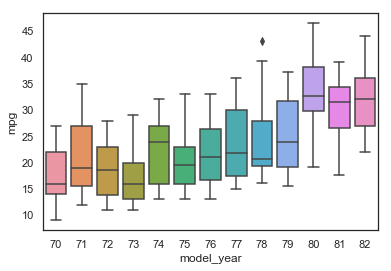

In [21]:
# box plot: mpg(mileage) vs model_year
sns.boxplot(x='model_year', y='mpg', data=mpg_df)

Interpretation of a boxplot: The box boundaries indicate the interquartile range -- the upper boundary marks the 25% quartile and the lower boundary marks the 75% quartile. The horizontal line inside the box indicates the median. Any solo points outside of the whiskers mark outliers while the whiskers themselves show the minimum and maximum values that are not outliers.

Apparently, mileage improved substantially in the 80's as compare to the 70's. Let's add another feature to our mpg dataframe which denotes whether the car was manufactured in the 70's or 80's.

In [22]:
# creating a new feature 'model_decade'
mpg_df['model_decade'] = np.floor(mpg_df.model_year/10)*10
mpg_df['model_decade'] = mpg_df['model_decade'].astype(int)
mpg_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,model_decade
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,80
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,80
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,80
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,80
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,80


Now, let's redraw our boxplot to look at mileage distribution for the two decades:

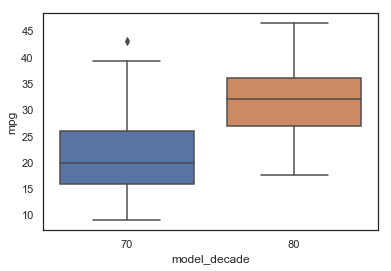

In [23]:
# a boxplot with multiple classes
sns.boxplot(x='model_decade', y='mpg', data=mpg_df)

But wait, there is more that can be done with boxplots. We can also add another feature, say region of origin, and see how that affects the relationship between mileage and manufacturing time, the two features we have been considering so far. The following code can do this for us.

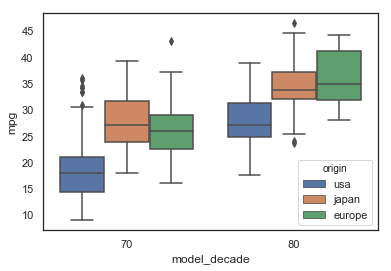

In [24]:
# boxplot: mpg (mileage) vs model_decade

# parameter hue is used to group by a specific feature, in this case 'origin'
sns.boxplot(x='model_decade', y='mpg', data=mpg_df, hue='origin')

Interpretation: according to the mpg dataset, in the 70's and early 80's, Europe and Japan produced cars with better mileage than did the USA. Interesting!

### Violin plots

Boxplots are an excellent way to examine the relationship of summary statistics of a numerical feature in relation to other categorical features. But what if we could get a hint regarding the entire distribution of a specific numerical feature grouped by other categorical features? Violin plots are designed to do exactly this. A violin plot is similar to a box plot, but it includes more detail about variations in the data.  The shape of a violin plot tells you the shape of the data distribution – so where the data points cluster around a common value, the plot is fatter, and where there are fewer data points, the plot is thinner. We will see a concrete example with the help of an exercise.

#### Exercise: Creating a violin plot

In this exercise, we will use the `mpg` dataset and generate a violin plot depicting the summary statistics of vehicle mileage (mpg) based on model_decade and region of origin.

1. Import the necessary python modules.

In [25]:
import seaborn as sns

2. Load the dataset.

In [26]:
mpg_df = sns.load_dataset("mpg")

3. Generate the violin plot using the violinplot function in seaborn.

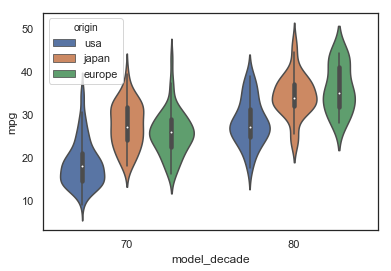

In [27]:
# creating the feature 'model_decade'
mpg_df['model_decade'] = np.floor(mpg_df.model_year/10)*10
mpg_df['model_decade'] = mpg_df['model_decade'].astype(int)

# code for violinplots
# parameter hue is used to group by a specific feature, in this case 'origin', while x represents the model year and y represent mileage
sns.violinplot(x='model_decade', y='mpg', data=mpg_df, hue='origin')

Interpretation of a violinplot: The fatter sections of the plot indicate ranges of higher probability of the y-axis feature, the thinner sections indicate areas of lower probability. The thick solid line at the center of each distribution represents the interquartile range -- the two ends are the 25% and 75% quantile and the dot is the median. The thinner solid line shows 1.5 times the interquartile range.

During the 70s, while most vehicles in the US had a median mileage of 19 mpg, vehicles in japan and europe had median mileages of around 27 and 25 mpg. While the mileages of vehicles in Europe and Japan jumped by 7 to 8 points in the 80s, the median mileage of vehicles in the US was still similar to the vehicles in Japan and Europe in the previous decade.

Caution regarding violinplots: Since violinplots estimate a probability distribution based on the existing data, it sometimes results in plots with assigning datapoints to negative values of feature on the y-axis. This may cause confusion and make readers doubt your results.

### Topic summary
In this section, we studied some plots that present summary statistics of various features in the dataset. These plots are especially useful representations of data when the datasets are huge and it is computationally expensive and time-intensive to generate plots that depict global patterns in the data. We learnt how to add mean and median markers in the histogram of a given feature in the dataset. We also studied box plots and violin plots -- while box plots depict the summary statistics alone (feature median and quartiles), violin plots also show the probability distribution of the feature across different value ranges.

### Assessment questions

The three lines in the 'box' of a boxplot indicate: </br>
a) mean, end of first quartile, and end of third quartile </br>
b) mean, beginning of first quartile, and end of third quartile </br>
c) median, beginning of first quartile, and end of third quartile </br>
d) median, end of first quartile, and end of third quartile </br>

answer: d </br>

The piece of information that is available in a violinplot but not in a boxplot is: </br>
a) count distribution of the feature over all datapoints in consideration </br>
b) median and quartile ranges of the feature over all datapoints in consideration </br>
c) probability distribution of the feature over all datapoints in consideration </br>
d) outliers among the datapoints in consideration </br>

answer: c </br>

## Chapter Summary

The choice of the most appropriate visualization(s) depends on four key elements: 
- the nature of features in a dataset:categorical/discrete numerical/continuous numerical
- the size of the dataset: small/medium large dataset
- density of the datapoints in chosen feature space: whether too many or too little datapoints assume certain feature values
- the context of the visualization: the source of the dataset and frequently used visualizations for the given application.

For the purpose of explaining concepts clearly and defining certain general guidelines, we classified visualizations into two categories: 
- plots representing the global patterns of the chosen features (e.g. histograms, scatter plots, hexbin plots, contour plots, line plots, heatmaps)  
- plots representing the summary statistics of the features (box plots, violin plots) 

We do not imply that a single-best visualization must be determined right away for any given application. For most datasets, the best visualizations will likely emerge from testing different kinds of plots and carefully examining the insights derived from each of them. This lesson provided the necessary resources to understand the interpretation and usage of various popular as well as less-widely employed informative visualization types. In the next lesson, we will build on this foundation to introduce interactivity in our visualizations.

## Quiz

When is it useful to generate a plot presenting summary statistics of features rather than global patterns? </br>
a) when the dataset is very small </br>
b) when the dataset is very huge </br>
c) when the dataset is medium-sized </br>
d) it is always useful independent of the size of the dataset </br>

answer: b

State true or false: There must exist a single-best visualization for a given dataset and application: </br>

answer: False </br>

What are good visualization types to present the relationship between two continuous numerical features with many datapoints falling in specific regions of their feature space? (multiple options may be correct): </br>
a) contour plot </br>
b) hexbin plot </br>
c) scatter plot </br>
d) line plot </br>

answer: a and b

A histogram for a specific feature in a dataset is a useful plot for which of the following: </br>
a) to spot outliers </br>
b) to examine the statistical distribution of an individual feature </br>
c) to know which values are taken most frequently by the given feature </br>
d) all of the above </br>

answer: d


## Activity

We’ll continue to work with the 120 years of [Olympic History dataset](https://github.com/abha-b/python_viz/blob/master/athlete_events.csv.zip) acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the github repo of this course. As a visualization specialist, your task is to create two plots for the 2016 medal winners from the 5 sports - Athletics, Swimming, Rowing, Football,  and Hockey:
1. a plot using an appropriate visualization technique that best presents a global pattern of the features height and weight of the 2016 medal winners from the 5 sports
2. a plot using an appropriate visualization technique that best presents a summary statistic of height and weight of players winning each type of medal (Gold/Silver/Bronze) in the data.

The reader is encouraged to use their creativity and skills in bringing out important insights from data.

### High-level steps:
1. Download the dataset, and format it as a pandas dataframe.
2. Filter the dataframe to only include the the rows corresponding to medal winners from year 2016, for the sports mentioned in the activity description.
3. Observe the features in the dataset and note their data type -- are they categorical or numerical?
4. Evaluate what would be appropriate visualization(s) for a global pattern to depict the features -- height and weight.
5. Evaluate what would be appropriate visualization(s) for depicting the Medal-wise summary statistics of the Weight and Height features, further segregated by player gender.

### Solution steps:

1. Download the Kaggle dataset hosted in the course github repository, and format it as pandas dataframe:

In [28]:
# load necessary modules
import pandas as pd
import seaborn as sns
from numpy import median, mean

# download file 'athlete_events.csv' from course github repository: https://github.com/TrainingByPackt/Interactive-Data-Visualization-with-Python
# read the dataset as a pandas dataframe
olympics_df = pd.read_csv('/Users/chandrasg/Desktop/packt_python_viz/athlete_events.csv')

# preview dataframe
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


2. Filter the dataframe to contain only medal winners of the year 2016 and for the sports mentioned in the activity description.

In [29]:
# filter the dataframe to contain medal winners only (for non-winners, the Medal feature is NaN)
# note use of the inplace parameter
olympics_winners = olympics_df.dropna(subset=['Medal'])

# list the top 5 sports
top_sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']

# filter dataframe to include 2016 records of specified sports
olympics_top_sports_winners_2016 = olympics_winners[(olympics_winners.Sport.isin(top_sports)) & (olympics_winners.Year == 2016)]
olympics_top_sports_winners_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


3. Observe the features in the dataset and note their data type -- are they categorical or numerical?

The Sport feature, the Team feature, the Medal feature, the Sex feature are all categorical, while the Age, Height, and Weight features are numerical. However, we should also note the range of values taken by the numerical features to get a sense of the data. This can be done using the describe function, as seen in the first chapter.

In [30]:
olympics_top_sports_winners_2016[['Age', 'Height', 'Weight']].describe()

,Age,Height,Weight
count,732.000000,729.000000,727.000000
mean,25.577869,180.023320,73.720770
std,4.451373,10.076398,14.279014
min,16.000000,150.000000,40.000000
25%,22.000000,173.000000,64.000000
50%,25.000000,180.000000,72.000000
75%,29.000000,187.000000,82.000000
max,40.000000,207.000000,136.000000


4. Based on the above, we are going to visualize the features Height and Weight depicting their global pattern:

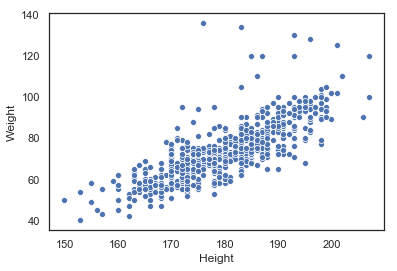

In [31]:
# import the seaborn library
import matplotlib.pyplot as plt
import seaborn as sns

fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax = sns.scatterplot(x="Height", y="Weight", data=olympics_top_sports_winners_2016)
plt.show()

It is interesting to note that there is an almost linear relationship between the Height and Weight of the medal winners, with a few outliers. However, since this is a fairly dense plot with many universities in certain ranges -- we will draw a hexbin plot to represent the data.

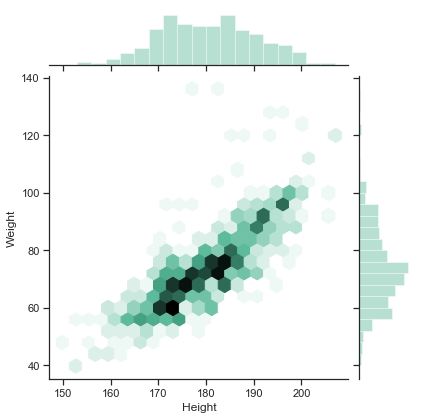

In [32]:
sns.set(style="ticks")

## hexbin plot
sns.jointplot(olympics_top_sports_winners_2016.Height, olympics_top_sports_winners_2016.Weight, kind="hex", color="#4CB391")

6. Now let us visualize the height and weight features, depicting its medal-wise summary statistics, segregated by player gender.

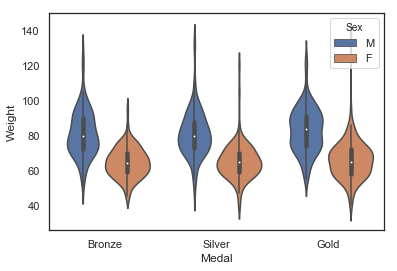

In [33]:
sns.set_style('white')
ax1 = sns.violinplot(x='Medal', y='Weight', data=olympics_top_sports_winners_2016, hue='Sex')

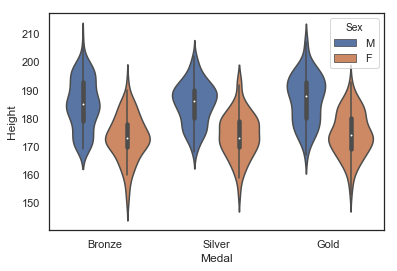

In [34]:
ax2 = sns.violinplot(x='Medal', y='Height', data=olympics_top_sports_winners_2016, hue='Sex')

As expected, we see the Height and Weight features do not differ significantly across the different medal winners. Also, Height and Weight is substantially less in female medal winners than male winners.